In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.3.0


In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


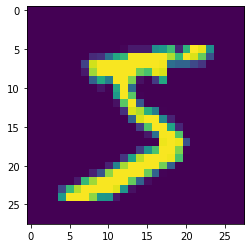

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [10]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

In [11]:
model = keras.Sequential()

In [12]:
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 2s 3ms/step - loss: 1.8584 - accuracy: 0.3757 - val_loss: 1.2740 - val_accuracy: 0.4957
Epoch 2/5
844/844 [==============================] - 2s 3ms/step - loss: 1.0647 - accuracy: 0.5627 - val_loss: 0.8345 - val_accuracy: 0.6817
Epoch 3/5
844/844 [==============================] - 2s 3ms/step - loss: 0.7641 - accuracy: 0.7089 - val_loss: 0.6803 - val_accuracy: 0.7497
Epoch 4/5
844/844 [==============================] - 2s 3ms/step - loss: 0.5514 - accuracy: 0.8062 - val_loss: 0.2501 - val_accuracy: 0.9303
Epoch 5/5
844/844 [==============================] - 2s 3ms/step - loss: 0.2046 - accuracy: 0.9417 - val_loss: 0.1431 - val_accuracy: 0.9627


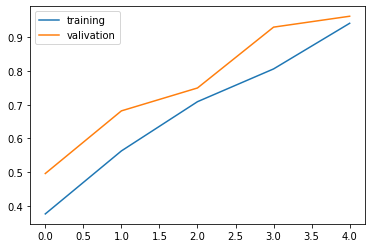

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [16]:
res = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1613 - accuracy: 0.9540
